## Predictive Maintenance Dataset(AI4I2020)

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle


In [131]:
import pandas as pd

#LOad the dataset
df = pd.read_csv("C:\\Users\\ravin\\Downloads\\ai4i2020.csv")

#Display first few rows of the dataset
print(df.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

# Exploratory Data Analysis

Missing values per column:
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

Summary statistics:
                UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               3

C:\Users\ravin\AppData\Local\Temp\ipykernel_9768\785562159.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Machine failure", data=df, palette='Set2')


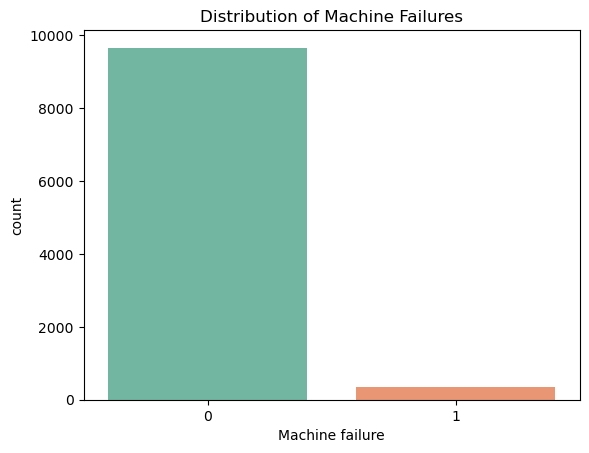

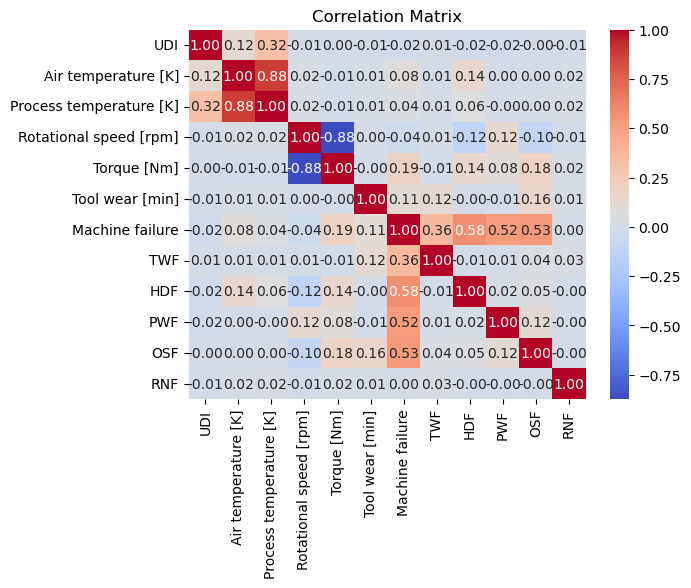

In [104]:

#Check for missing values
print("Missing values per column:\n", df.isnull().sum())

#summary statistics
print("\nSummary statistics:\n", df.describe())

#Distribution of machine failures
sns.countplot(x="Machine failure", data=df, palette='Set2')
plt.title("Distribution of Machine Failures")
plt.show()

#Correlation matrix(Only Numeric Columns)
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

C:\Users\ravin\AppData\Local\Temp\ipykernel_9768\3695129599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='pastel')


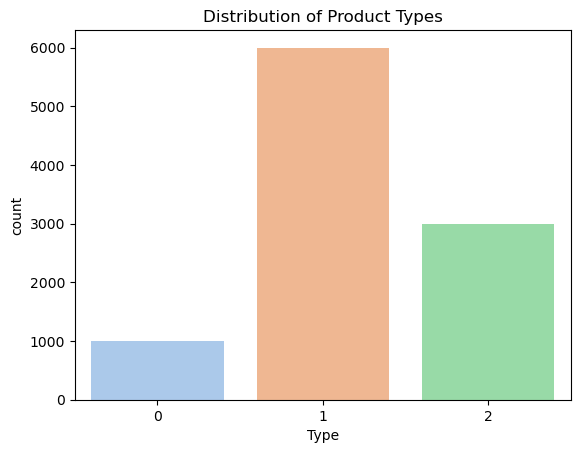

C:\Users\ravin\AppData\Local\Temp\ipykernel_9768\3695129599.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Machine failure', y='Rotational speed [rpm]', data=df, palette='coolwarm')


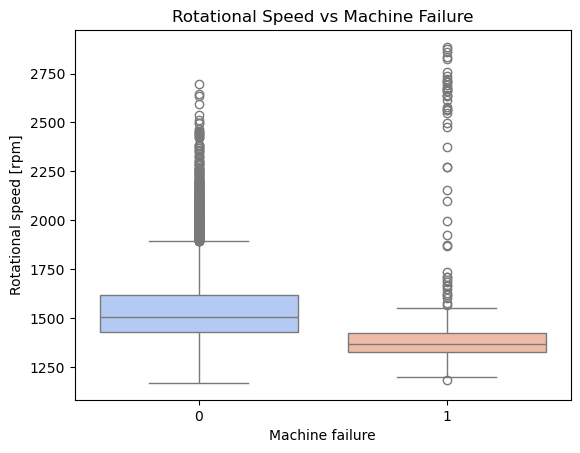

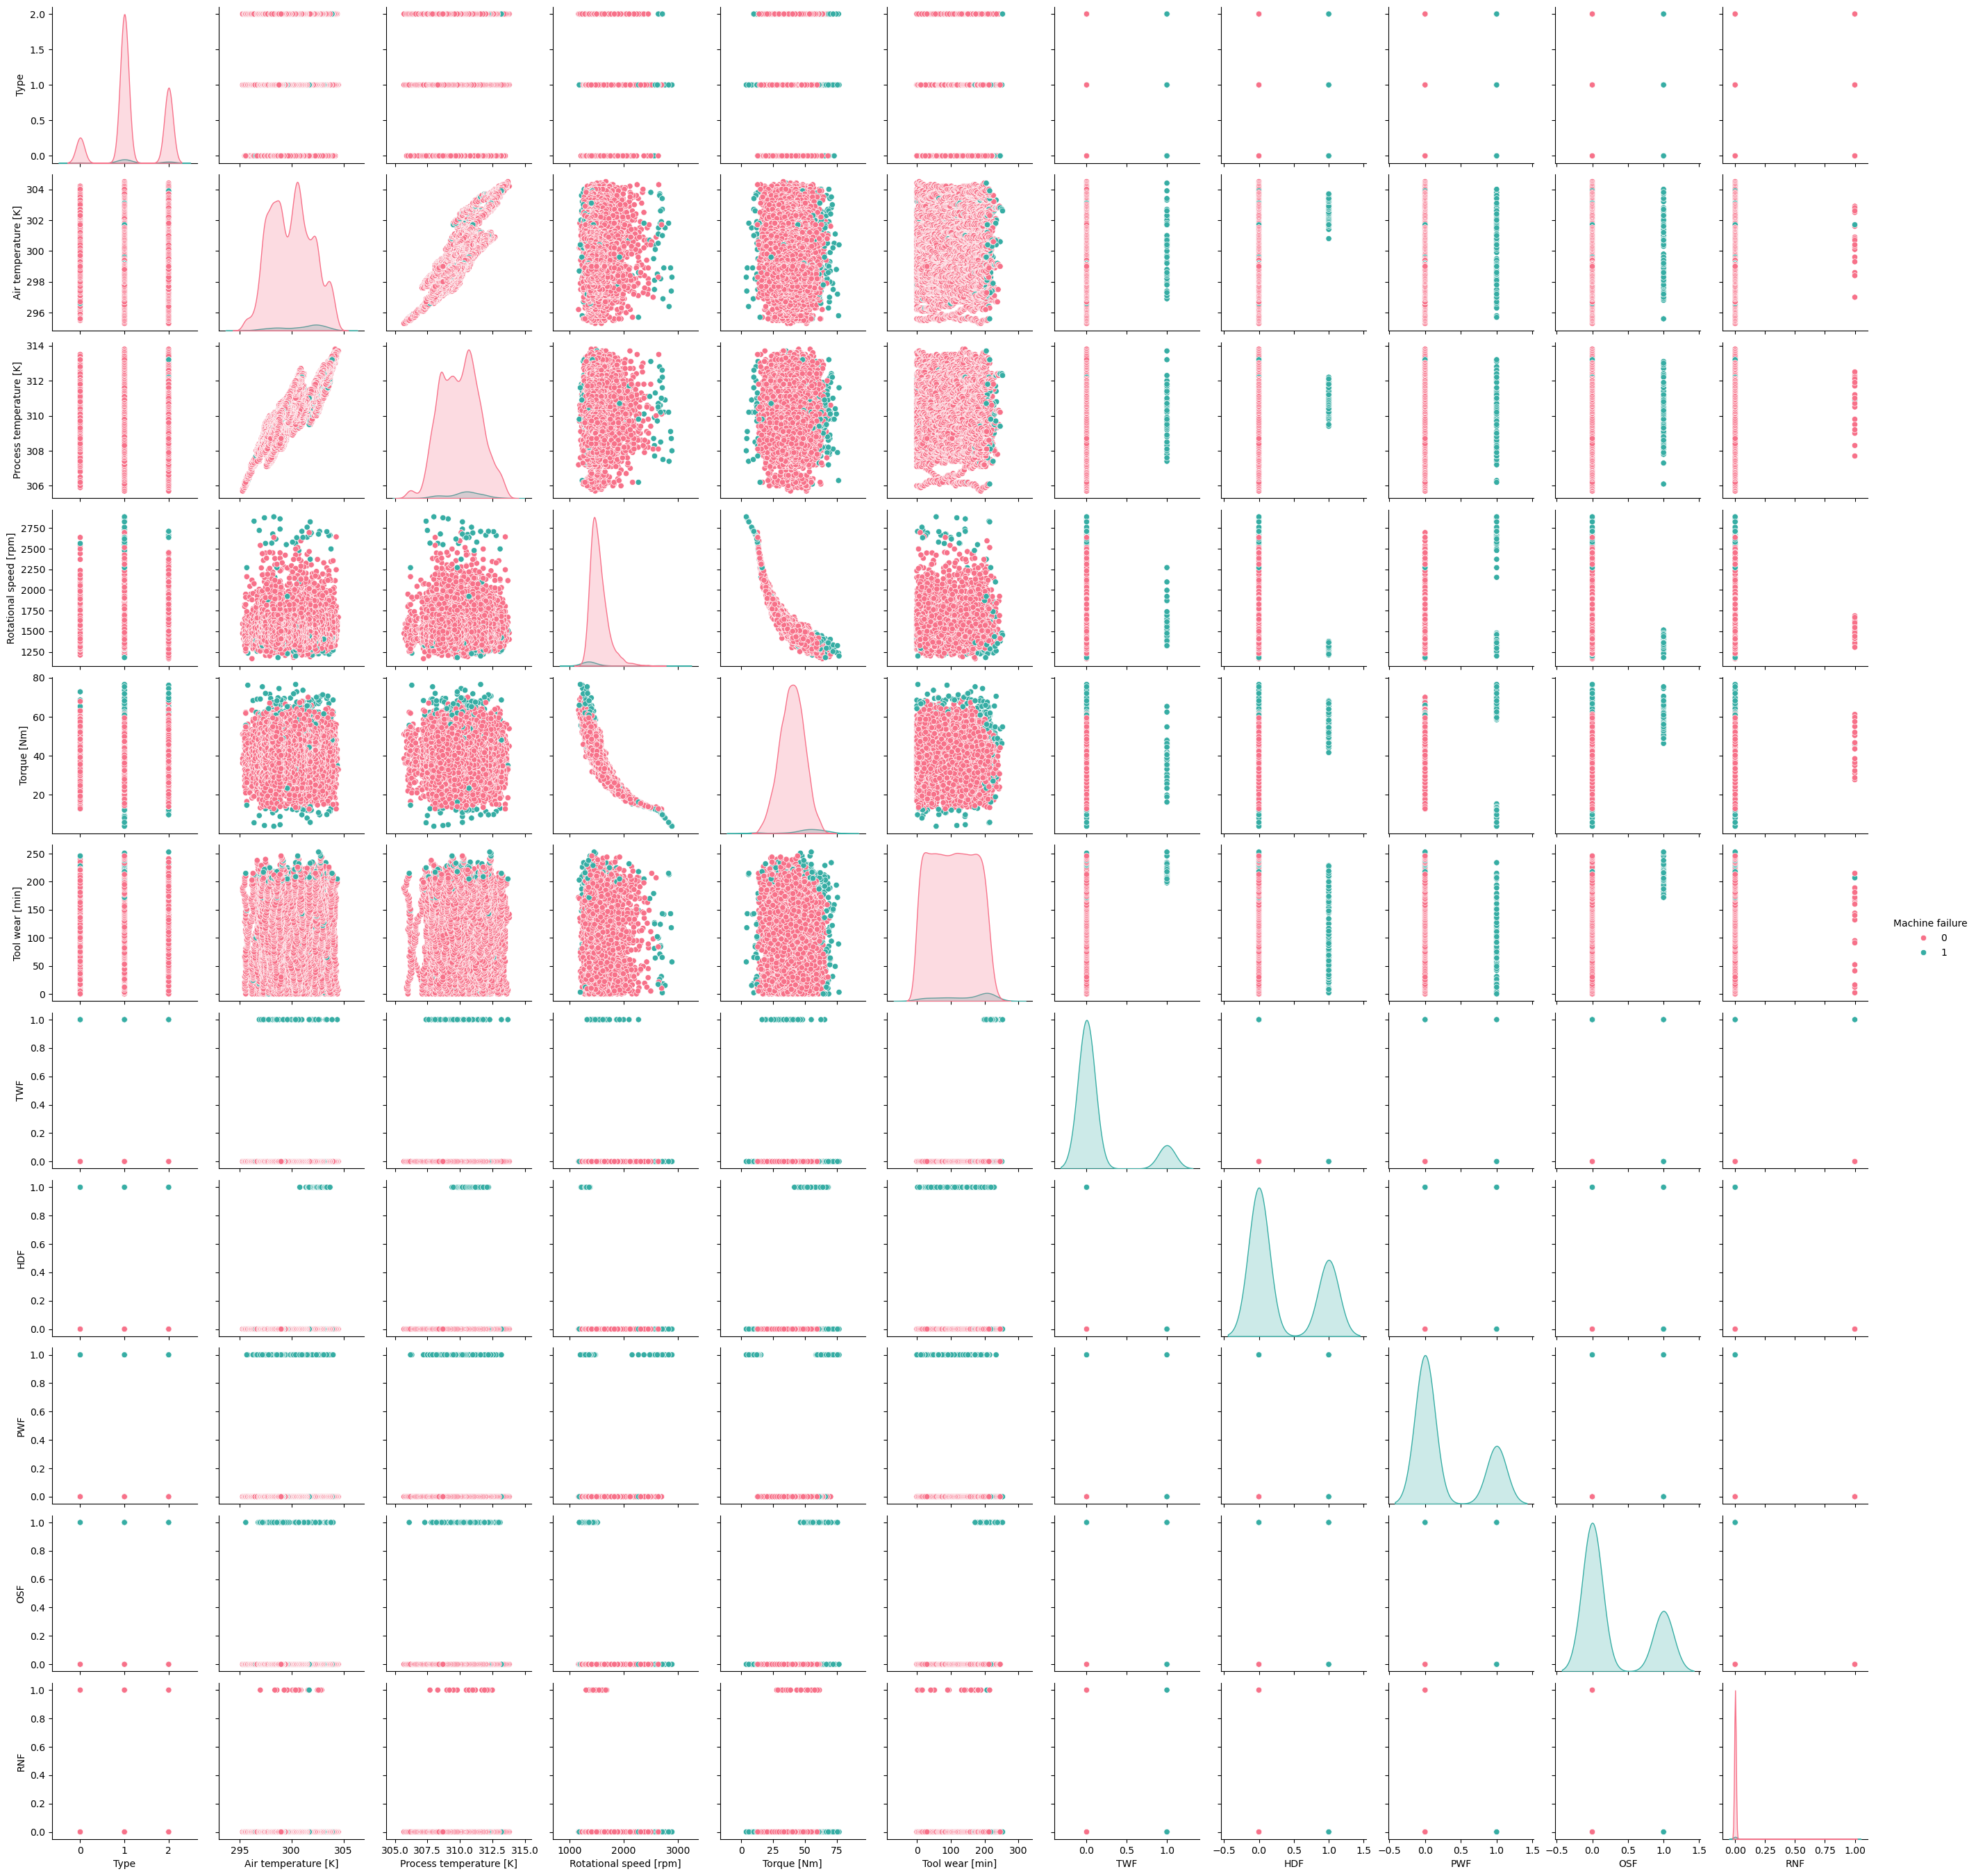

In [129]:
# Distribution of product types
sns.countplot(x='Type', data=df, palette='pastel')
plt.title('Distribution of Product Types')
plt.show()

# Boxplot of rotational speed by machine failure
sns.boxplot(x='Machine failure', y='Rotational speed [rpm]', data=df, palette='coolwarm')
plt.title('Rotational Speed vs Machine Failure')
plt.show()




## Data Preprocessing

In [119]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])

# Drop unnecessary columns 
columns_to_drop = ['UDI', 'Product ID', 'NonExistentColumn']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]  # Filter existing columns
df.drop(columns=columns_to_drop, inplace=True)

#Split the data into features and traget
X = df.drop(columns=['Machine failure'])
y = df['Machine failure']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the data into training and tetsing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model Building

In [121]:

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.999
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Logistic Regression Confusion Matrix:
 [[1939    0]
 [   2   59]]
Random Forest Accuracy: 0.999
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Random Forest Confusion Matrix:
 [[1939    0]
 [   2   59]]


## Model Tuning

In [123]:

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Best Random Forest Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print("Best Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.999124968718745
Best Random Forest Accuracy: 0.999
Best Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Best Random Forest Confusion Matrix:
 [[1939    0]
 [   2   59]]


## Feature Importance

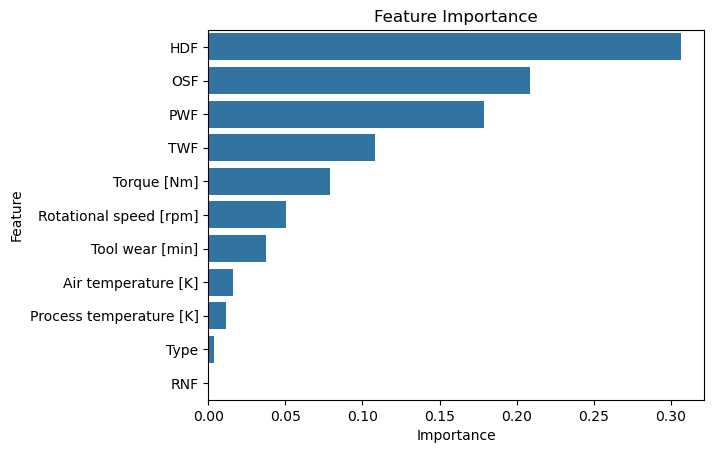

In [107]:
# Feature importance from the best Random Forest model
feature_importances = best_rf.feature_importances_
feature_names = df.drop('Machine failure', axis=1).columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [124]:
#Save the Model
with open('best_rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

print("Model saved successfully as best_rf_model.pkl")


Model saved successfully as best_rf_model.pkl
